<a href="https://colab.research.google.com/github/Oswaldo-Villegas/Proyecto-2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


----------------------------
----------------------------

PROYECTO N° 02. 

Alumno: Oswaldo David Villegas Santiago.

E-mail: villegas.sod@gmail.com

# **Ejercicio N°1:**
Escribir una función que devuelva un Hexágono.

In [ ]:
def imprimir_Hexagono():         # Definimos la función imprimir_Hexagono sin argumentos.
	for i in range(0,6,1):         # Inicialimos el bucle for para una secuencia de valores de 0 a 5.
		if (i == 1) or (i == 5):     # Definimos una serie de condicionales:
			print('  +++++  ')         # 1) Si i es igual a 1 o i es igual a 5 se imprime la primera y ultima linea de +´s del exagono.
		elif (i == 2 ) or (i == 4):  # 2) En caso de no cumplir la condicional anterior, se define un segundo caso: si i es igual a 2, 
			print(' +++++++ ')         # o i igual a 4, se imprimira la segunda y penultima linea de +.
		elif i == 3:                 # Finalmente si i es igual a 3, se imprimira la linea intermedia del exagono.
			print('+++++++++')
			i += 1

imprimir_Hexagono()

  +++++  
 +++++++ 
+++++++++
 +++++++ 
  +++++  


# **Ejercicio N°2:**
Generar un Notebook Colab con código y resultados, con el 
siguiente fichero autos.csv que contiene información de autos de 
un periodo de tiempo. Resolver los siguientes:

In [ ]:
import pandas as pd
df = pd.read_csv('/content/autos.csv', sep = ';') # archivo *.csv, idicamos sep = ';' por la forma en que se encuntran los datos.
df.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


# **Limpieza y tratamiento de las variables**

In [ ]:
df.info() # obtenemos información de la base datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [ ]:
# total datos perdidos
pd.DataFrame(df.isna().sum(), columns = ['Perdidos'])

,Perdidos
Millas_Por_Galon,8
Cilindros,0
Pais_Origen,0
Peso_En_Libras,0
Desplazamiento,0
Aceleracion,0
Nombre,0
Anyo,0
Caballo_De_Fuerza,6


In [ ]:
df.sort_values('Millas_Por_Galon', na_position='first').head(10) # Mostramos los datos perdidos de la variable Millas_Por_Galon al inicio

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
10,NaN,4,Europe,3090,133.0,17.5,citroen ds-21 pallas,1/01/1970,115.0
11,NaN,8,USA,4142,350.0,11.5,chevrolet chevelle concours (sw),1/01/1970,165.0
12,NaN,8,USA,4034,351.0,11.0,ford torino (sw),1/01/1970,153.0
13,NaN,8,USA,4166,383.0,10.5,plymouth satellite (sw),1/01/1970,175.0
14,NaN,8,USA,3850,360.0,11.0,amc rebel sst (sw),1/01/1970,175.0
17,NaN,8,USA,3353,302.0,8.0,ford mustang boss 302,1/01/1970,140.0
39,NaN,4,Europe,1978,97.0,20.0,volkswagen super beetle 117,1/01/1971,48.0
367,NaN,4,Europe,2800,121.0,15.4,saab 900s,1/01/1982,110.0
34,9.0,8,USA,4732,304.0,18.5,hi 1200d,1/01/1970,193.0
31,10.0,8,USA,4615,360.0,14.0,ford f250,1/01/1970,215.0


In [ ]:
df.sort_values('Caballo_De_Fuerza', na_position='first').head(10) # Mostramos los datos perdidos de la variable Caballo_De_Fuerza al inicio

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
38,25.0,4,USA,2046,98.0,19.0,ford pinto,1/01/1971,NaN
133,21.0,6,USA,2875,200.0,17.0,ford maverick,1/01/1974,NaN
337,40.9,4,Europe,1835,85.0,17.3,renault lecar deluxe,1/01/1980,NaN
343,23.6,4,USA,2905,140.0,14.3,ford mustang cobra,1/01/1980,NaN
361,34.5,4,Europe,2320,100.0,15.8,renault 18i,1/01/1982,NaN
382,23.0,4,USA,3035,151.0,20.5,amc concord dl,1/01/1982,NaN
109,26.0,4,Europe,1950,97.0,21.0,volkswagen super beetle,1/01/1973,46.0
25,26.0,4,Europe,1835,97.0,20.5,volkswagen 1131 deluxe sedan,1/01/1970,46.0
39,NaN,4,Europe,1978,97.0,20.0,volkswagen super beetle 117,1/01/1971,48.0
251,43.1,4,Europe,1985,90.0,21.5,volkswagen rabbit custom diesel,1/01/1978,48.0


In [ ]:
# Se seleccionan las variable de tipo numericas para su previo tratamiento (inputación).
# 'Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza'
data_num = df.loc[:, ['Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']] 
from sklearn.impute import KNNImputer

imputacion_NP = KNNImputer(n_neighbors=2)
data_num =imputacion_NP.fit_transform(data_num)

In [ ]:
data_num

array([[  18. , 3504. ,  307. ,   12. ,  130. ],
       [  15. , 3693. ,  350. ,   11.5,  165. ],
       [  18. , 3436. ,  318. ,   11. ,  150. ],
       ...,
       [  32. , 2295. ,  135. ,   11.6,   84. ],
       [  28. , 2625. ,  120. ,   18.6,   79. ],
       [  31. , 2720. ,  119. ,   19.4,   82. ]])

In [ ]:
# Dado que se obtiene un arreglo, se tranforma este en una base de Datos.
data_num = pd.DataFrame(
    data=data_num,
    columns=['Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza'])

In [ ]:
# Verificación de no exitencia de datos faltantes en el nuevo dataframe.
data_num.isnull().sum()

Millas_Por_Galon     0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Caballo_De_Fuerza    0
dtype: int64

In [ ]:
# Se seleccionan las variable de tipo string (caracter).
data_str = df.loc[:,['Pais_Origen','Nombre','Anyo','Cilindros']]
data = pd.concat([data_str, data_num], axis = 1, sort = False)

In [ ]:
# Juntamos ambas bases.
data = pd.concat([data_str, data_num], axis = 1, sort = False)

# **Generar 6 nuevas variables aplicando los siguientes criterios con las variables numéricas:**

In [ ]:
data.columns

Index(['Pais_Origen', 'Nombre', 'Anyo', 'Cilindros', 'Millas_Por_Galon',
       'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza'],
      dtype='object')

In [ ]:
# Var1 = Log10(var1/var2)
import numpy as np
data['Var1'] = np.log10(data.Peso_En_Libras/data.Aceleracion)
data.head()

,Pais_Origen,Nombre,Anyo,Cilindros,Millas_Por_Galon,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,Var1
0,USA,chevrolet chevelle malibu,1/01/1970,8,18.0,3504.0,307.0,12.0,130.0,2.465383
1,USA,buick skylark 320,1/01/1970,8,15.0,3693.0,350.0,11.5,165.0,2.506681
2,USA,plymouth satellite,1/01/1970,8,18.0,3436.0,318.0,11.0,150.0,2.494660
3,USA,amc rebel sst,1/01/1970,8,16.0,3433.0,304.0,12.0,150.0,2.456493
4,USA,ford torino,1/01/1970,8,17.0,3449.0,302.0,10.5,140.0,2.516504


In [ ]:
# Var2 = Sqrt(var1)exp(var2)/200
data['Var2'] = np.sqrt(data.Peso_En_Libras)*np.exp(data.Desplazamiento)/200

In [ ]:
# Var3 = Si var 1 > var 2 → 5, caso contrario 3
# data.Desplazamiento > data.Caballo_De_Fuerza
columna = {}
columna3 =  data.Desplazamiento - data.Caballo_De_Fuerza
for i in columna3:
  if i < 0:
    columna[i] = 3
  else:
    columna[i]= 5
data['Var3'] = pd.DataFrame(columna.values(), columns=['Columna 3'])

In [ ]:
data['Var3'] = np.where(data.Desplazamiento > data.Caballo_De_Fuerza, 5, 3)
data.isna().sum()

Pais_Origen          0
Nombre               0
Anyo                 0
Cilindros            0
Millas_Por_Galon     0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Caballo_De_Fuerza    0
Var1                 0
Var2                 0
Var3                 0
dtype: int64

In [ ]:
# Var4 = 1/logn(var1/var2)*100
data['Var4'] = (1/np.log(data.Millas_Por_Galon / data.Desplazamiento))*100

In [ ]:
# Var5 = var2**2/var1
data['Var5'] = data.Desplazamiento**2/data.Millas_Por_Galon

# **Generar 3 variables cualitativas ordinales con los siguientes criterios:**
- Si es mayor a la “media + 1 x desviación estándar” → Alto
- Si está entre “media - 1 x desviación estándar” y “media + 1 x desviación estándar” → Medio
- Si es menor a la “media - 1 x desviación estándar” → Bajo

In [ ]:
# Var6
Lista_condiciones = [
    (data.Millas_Por_Galon > data.Millas_Por_Galon.mean()+1*data.Millas_Por_Galon.std()) ,
    (data.Millas_Por_Galon >= data.Millas_Por_Galon.mean()-1*data.Millas_Por_Galon.std()) & (data.Millas_Por_Galon <= data.Millas_Por_Galon.mean()+1*data.Millas_Por_Galon.std()),
    (data.Millas_Por_Galon < data.Millas_Por_Galon.mean()-1*data.Millas_Por_Galon.std())]
choicelist = ['ALto', 'Medio', 'Bajo']
data['Var6'] = np.select(Lista_condiciones, choicelist, default='Not Specified')

In [ ]:
# Var7
Lista_condiciones = [
    (data.Peso_En_Libras > data.Peso_En_Libras.mean()+1*data.Peso_En_Libras.std()) ,
    (data.Peso_En_Libras >= data.Peso_En_Libras.mean()-1*data.Peso_En_Libras.std()) & (data.Peso_En_Libras <= data.Peso_En_Libras.mean()+1*data.Peso_En_Libras.std()),
    (data.Peso_En_Libras < data.Peso_En_Libras.mean()-1*data.Peso_En_Libras.std())]
choicelist = ['ALto', 'Medio', 'Bajo']
data['Var7'] = np.select(Lista_condiciones, choicelist, default='Not Specified')

In [ ]:
#Var8
Lista_condiciones = [
    (data.Desplazamiento > data.Desplazamiento.mean()+1*data.Desplazamiento.std()) ,
    (data.Desplazamiento >= data.Desplazamiento.mean()-1*data.Desplazamiento.std()) & (data.Desplazamiento <= data.Desplazamiento.mean()+1*data.Desplazamiento.std()),
    (data.Desplazamiento < data.Desplazamiento.mean()-1*data.Desplazamiento.std())]
choicelist = ['ALto', 'Medio', 'Bajo']
data['var8'] = np.select(Lista_condiciones, choicelist, default='Not Specified')

In [ ]:
# contar cuanto se repiten cada uno de los valores
data.Var6.value_counts()

Medio    253
Bajo      78
ALto      75
Name: Var6, dtype: int64

In [ ]:
# contar cuanto se repiten cada uno de los valores
data.Var7.value_counts()

Medio    248
ALto      82
Bajo      76
Name: Var7, dtype: int64

In [ ]:
# contar cuanto se repiten cada uno de los valores
data.var8.value_counts()

Medio    267
ALto     103
Bajo      36
Name: var8, dtype: int64

# **Crear una función que muestre los siguientes gráficos para las variables numéricas según una variable numérica:**
- Cajas y bigotes
- Barras de la media
- Histograma con Curva

In [ ]:
data.info()

In [ ]:
# Convertimos Cilindros a str
data['Cilindros'] = data['Cilindros'].apply(str)  # ya convertido en str

In [ ]:
columnas = data_num.select_dtypes(include=['float64', 'int']).columns
columnas

Index(['Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion',
       'Caballo_De_Fuerza'],
      dtype='object')

## Función gráfico

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
def grafico_numericos(columnas, data, x):
  
  for i, colum in enumerate(columnas): 
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.boxplot(   # boxplot  violinplot
        x = x,
        y = colum,
        data  = data,
        )
    ax.set_title(colum, fontsize = 10, fontweight = "bold")
    ax.tick_params(labelsize = 8)
    ax.set_xlabel("")


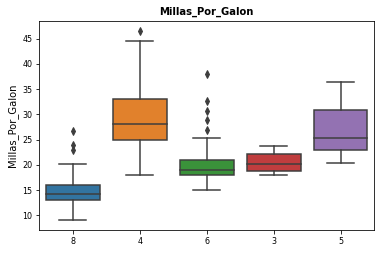

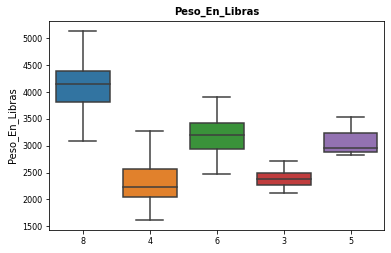

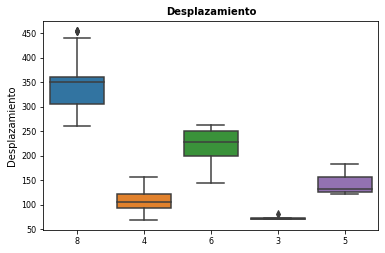

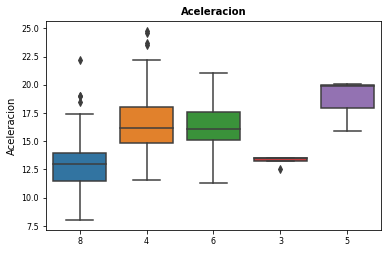

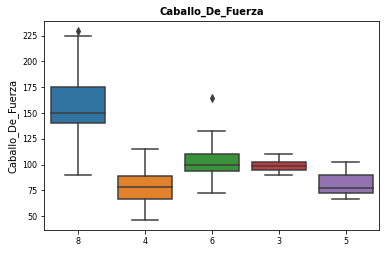

In [ ]:
x = data.Cilindros  # variable cualitativa

grafico_numericos(columnas, data, x)

In [ ]:
def grafico_Barras(columnas, data, x):
  
  for i, colum in enumerate(columnas): 
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.barplot(   
         x = x,
         y = colum,
         data  = data,
         estimator = np.median
         )

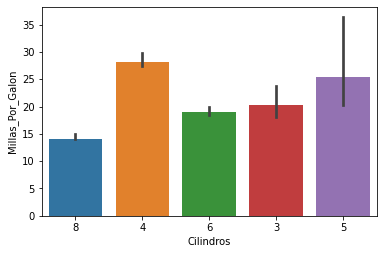

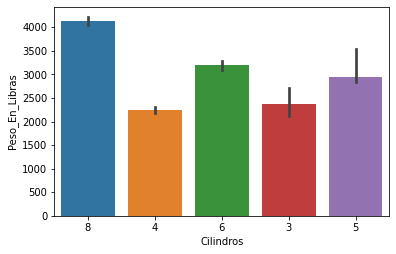

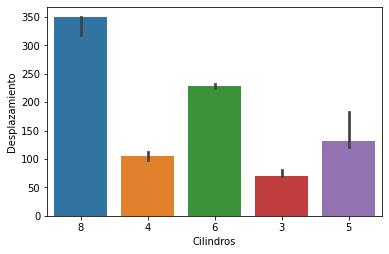

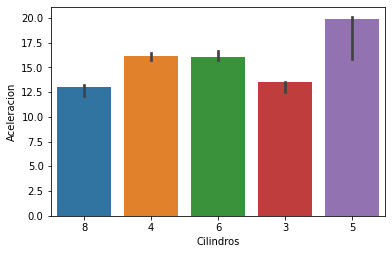

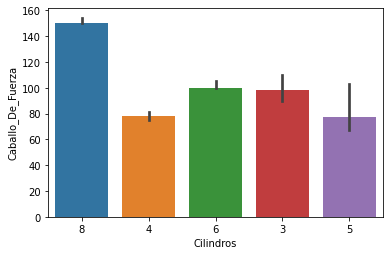

In [ ]:
x = data.Cilindros  # variable cualitativa

grafico_Barras(columnas, data, x)

In [ ]:
def Histogramas(columnas, Base):
  for i, colum in enumerate(columnas):
    x = Base.loc[:,colum]
    fig, ax = plt.subplots(figsize=(6, 3.84))
    sns.set_palette ("hls")
    sns.distplot(x,
                 color="r",
                 bins=30,
                 kde=True)
    ax.set_title(colum, fontsize = 10, fontweight = "bold")
    ax.tick_params(labelsize = 8)
    ax.set_xlabel("")
    plt.show()
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


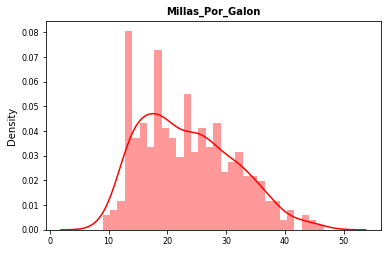

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


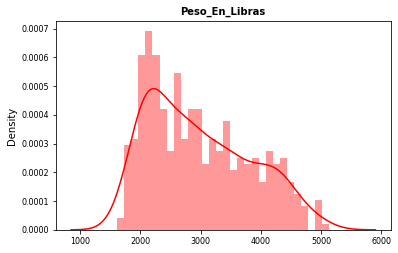

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


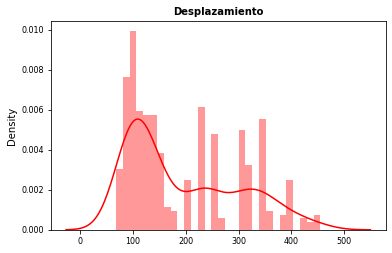

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


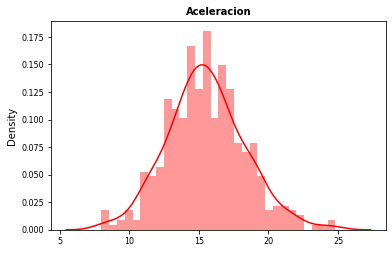

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


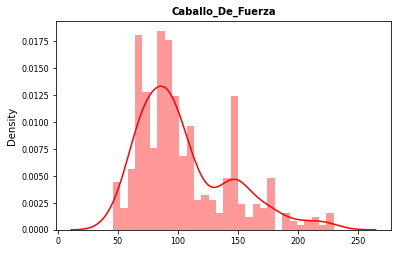

In [ ]:
Histogramas(columnas, data_num)

# **Crear una función que devuelva un mapa de calor con la correlación de todas las variables numéricas (incluye las generadas), para cada país**

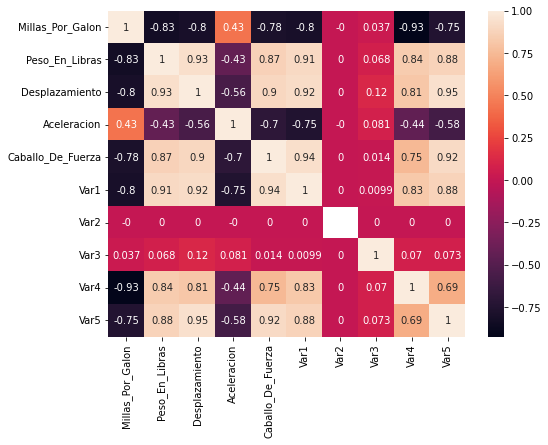

In [ ]:
# grilla de correlación
plt.figure(figsize=(8,6))
correlacion = data.corr()
sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True
            );